In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd

In [26]:
import datetime as dt

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [28]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [29]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [30]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
clima = engine.execute('select date, prcp from Measurement where date between "2016-08-23" and "2017-08-23"').fetchall()
# Calculate the date 1 year ago from the last data point in the database
climadata = pd.DataFrame(clima)
climadata = climadata.rename(columns={0:"date", 1:"prcp"})
climadata
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


<BarContainer object of 2230 artists>

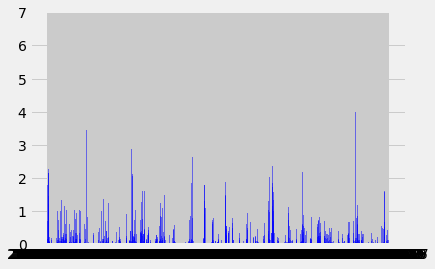

In [34]:
plt.bar(climadata["date"], climadata["prcp"], color='blue', alpha=0.5, align="center")

In [35]:
climadata.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
clima2 = engine.execute('select station, count(station) as num_count from Measurement group by station order by num_count desc').fetchall()
climadata2 = pd.DataFrame(clima2)
climadata2 = climadata2.rename(columns={0:"station", 1:"num_count"})
climadata2

,station,num_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [37]:
#funcion maxima
climadata2.max()

station      USC00519523
num_count           2772
dtype: object

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
clima3 = engine.execute('select station, tobs from Measurement where date between "2016-08-23" and "2017-08-23"').fetchall()
# Calculate the date 1 year ago from the last data point in the database
climadata3 = pd.DataFrame(clima3)
climadata3 = climadata3.rename(columns={0:"station", 1:"tobs"})
climadata3

,station,tobs
0,USC00519397,81.0
1,USC00519397,79.0
2,USC00519397,80.0
3,USC00519397,79.0
4,USC00519397,77.0
...,...,...
2225,USC00516128,71.0
2226,USC00516128,78.0
2227,USC00516128,76.0
2228,USC00516128,76.0


In [43]:
climadata3['bin'] = pd.cut(climadata3['tobs'], bins=[0,12,24,36,48,60,72,84],labels=['<12', '12-24', '25-36','37-48','49-60','61-72','+72'])

In [46]:
#Contando jugadores por bin
df_bin = climadata3[['bin','station']].groupby(['bin']).count()
df_bin =df_bin['station']
df_bin=df_bin.to_frame()
df_bin = df_bin.reset_index(level=0)
df_bin= df_bin.rename(columns={"Count of stations":"Bin",
                                "station":"Count of stations"})


df_bin


,bin,Count of stations
0,<12,0
1,12-24,0
2,25-36,0
3,37-48,0
4,49-60,10
5,61-72,672
6,+72,1545


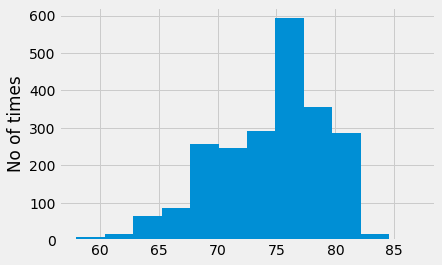

In [47]:
plt.hist(climadata3["tobs"], bins=12)
plt.ylabel('No of times')
plt.show()